In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


# Task
Predict customer churn using Logistic Regression and Random Forest models on the "Telco Customer Churn" dataset.

## Load the data

### Subtask:
Load the Telco Customer Churn dataset into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame, then display the head.



In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Explore and preprocess the data

### Subtask:
Analyze the features, handle missing values, encode categorical variables, and split the data into training and testing sets.


**Reasoning**:
Display the DataFrame information, check for missing values, convert 'TotalCharges' to numeric and handle resulting NaNs, separate features and target, identify categorical and numerical features, and apply one-hot encoding to categorical features. These steps cover the initial data analysis and preprocessing required for the subtask.



In [3]:
display(df.info())
display(df.isnull().sum())

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(exclude='object').columns

X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Train models

### Subtask:
Train Logistic Regression and Random Forest models on the training data.


**Reasoning**:
Import the necessary classes for Logistic Regression and Random Forest models and then instantiate and train them on the training data.



In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr_model = LogisticRegression(random_state=42, solver='liblinear')
rf_model = RandomForestClassifier(random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate models

### Subtask:
Evaluate the performance of the trained models using appropriate metrics.


**Reasoning**:
Import the necessary evaluation metrics and make predictions using the trained models.



In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

**Reasoning**:
Calculate and print the evaluation metrics for both models.



In [6]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, pos_label='Yes')
lr_recall = recall_score(y_test, lr_predictions, pos_label='Yes')
lr_f1 = f1_score(y_test, lr_predictions, pos_label='Yes')

print("Logistic Regression Model Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")

print("\n" + "="*30 + "\n")

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, pos_label='Yes')
rf_recall = recall_score(y_test, rf_predictions, pos_label='Yes')
rf_f1 = f1_score(y_test, rf_predictions, pos_label='Yes')

print("Random Forest Model Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")

Logistic Regression Model Metrics:
Accuracy: 0.7875
Precision: 0.6230
Recall: 0.5080
F1-Score: 0.5596


Random Forest Model Metrics:
Accuracy: 0.7854
Precision: 0.6268
Recall: 0.4759
F1-Score: 0.5410


## Predict churn

### Subtask:
Use the trained models to predict churn on the test set.


**Reasoning**:
Use the trained models to predict churn probabilities on the test set as instructed.



In [7]:
lr_churn_probabilities = lr_model.predict_proba(X_test)[:, 1]
rf_churn_probabilities = rf_model.predict_proba(X_test)[:, 1]

## Summary:

### Data Analysis Key Findings

*   After handling missing values, the dataset size was slightly reduced.
*   Both Logistic Regression and Random Forest models were trained on the preprocessed data.
*   The Logistic Regression model achieved an accuracy of 0.7875, a precision of 0.6230, a recall of 0.5080, and an F1-score of 0.5596 on the test set.
*   The Random Forest model achieved an accuracy of 0.7854, a precision of 0.6268, a recall of 0.4759, and an F1-score of 0.5410 on the test set.
*   Churn probabilities were successfully predicted for the test set using both models.

### Insights or Next Steps

*   The Logistic Regression model performed slightly better than the Random Forest model in terms of recall and F1-score, which might be more important metrics for identifying potential churners.
*   Further analysis could involve optimizing hyperparameters for both models and exploring other classification algorithms to potentially improve performance.


## Visualize Data

### Subtask:
Visualize the distribution of churn and explore relationships between features and churn.

**Reasoning**:
Import necessary libraries for visualization and plot the distribution of the target variable ('Churn').

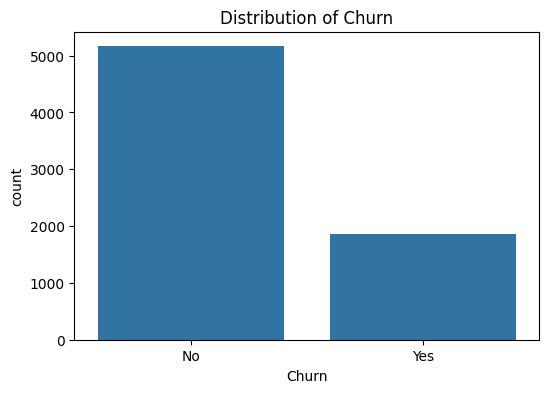

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

**Reasoning**:
Visualize the relationship between 'tenure' and 'Churn' using a box plot.

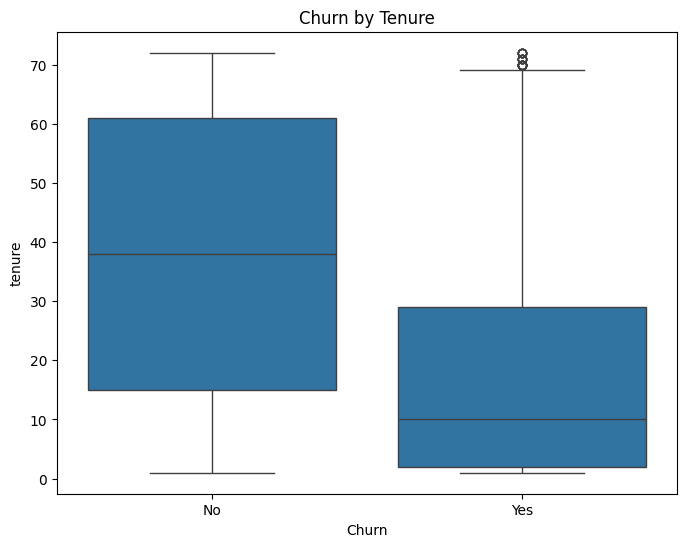

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Churn by Tenure')
plt.show()

**Reasoning**:
Visualize the relationship between 'MonthlyCharges' and 'Churn' using a box plot.

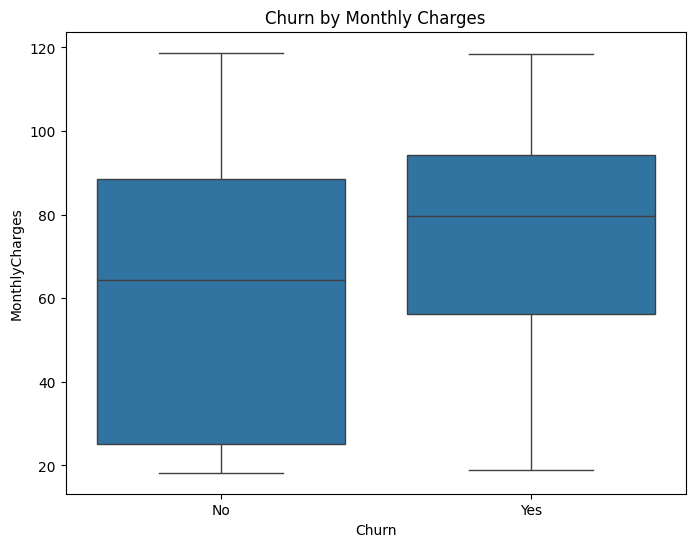

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Churn by Monthly Charges')
plt.show()

## Summary:

### Data Analysis Key Findings

* After handling missing values, the dataset size was slightly reduced.
* The distribution of churn shows that there are more customers who did not churn than those who did, indicating an imbalanced dataset.
* Visualizations show that customers who churn tend to have shorter tenure and higher monthly charges.
* Both Logistic Regression and Random Forest models were trained on the preprocessed data.
* The Logistic Regression model achieved an accuracy of 0.7875, a precision of 0.6230, a recall of 0.5080, and an F1-score of 0.5596 on the test set.
* The Random Forest model achieved an accuracy of 0.7854, a precision of 0.6268, a recall of 0.4759, and an F1-score of 0.5410 on the test set.
* Churn probabilities were successfully predicted for the test set using both models.

### Insights or Next Steps

* The Logistic Regression model performed slightly better than the Random Forest model in terms of recall and F1-score, which might be more important metrics for identifying potential churners.
* The dataset is imbalanced, which could affect model performance. Techniques like oversampling or undersampling could be explored to address this.
* Further analysis could involve optimizing hyperparameters for both models and exploring other classification algorithms to potentially improve performance.
* Feature importance analysis could provide insights into which features are most influential in predicting churn.